## Importing Libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

### XGBoost

In [4]:
import xgboost as xgb

### Warning

In [96]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
column_name = ["MPG", "Cylinders", "Displacement","Horsepower","Weight","Acceleration","Model Year", "Origin"]
data = pd.read_csv("auto-mpg.data", names = column_name, na_values = "?", comment = "\t",sep = " ", skipinitialspace = True)

In [7]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [8]:
data = data.rename(columns={"MPG":"target"})

In [9]:
data.head()

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [10]:
data.shape

(398, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
target          398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
target,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
Origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


## Missing Value

In [13]:
data.isnull().sum()

target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [14]:
data["Horsepower"]=data["Horsepower"].fillna(data["Horsepower"].mean())

In [15]:
data.isnull().sum()

target          0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

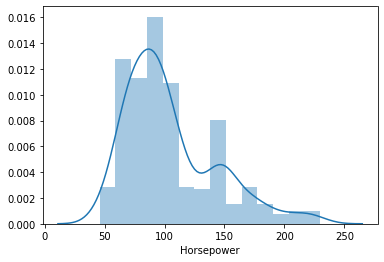

In [16]:
sns.distplot(data.Horsepower)

## EDA

In [17]:
corr_matrix = data.corr()

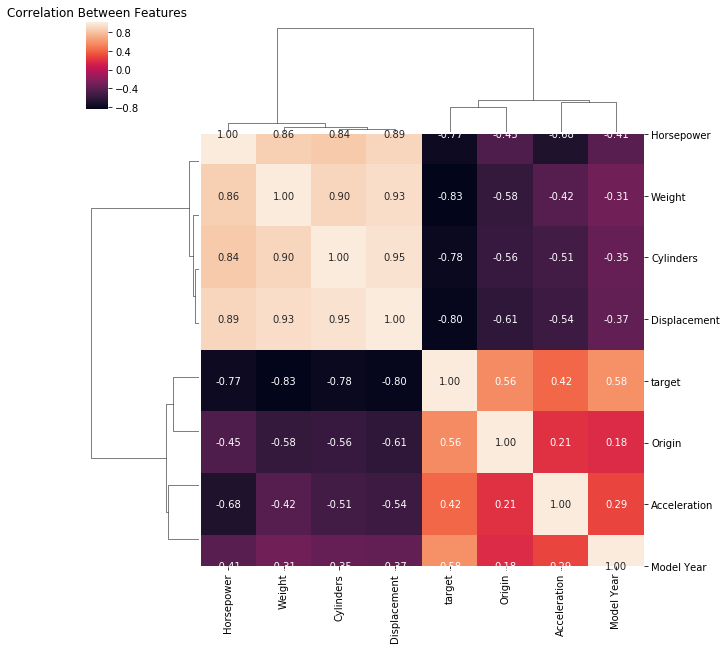

In [18]:
sns.clustermap(corr_matrix,annot=True,fmt=".2f")
plt.title("Correlation Between Features")
plt.show()

In [19]:
threshold = 0.75

In [20]:
Filter = np.abs(corr_matrix["target"]) > threshold

In [21]:
corr_features = corr_matrix.columns[Filter].tolist()

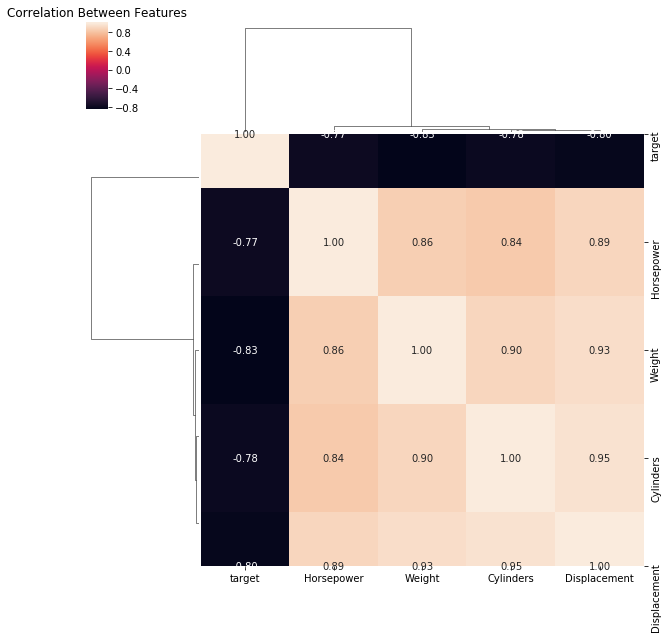

In [22]:
sns.clustermap(data[corr_features].corr(),annot=True,fmt=".2f")
plt.title("Correlation Between Features")
plt.show()

In [23]:
# Multicollinearity

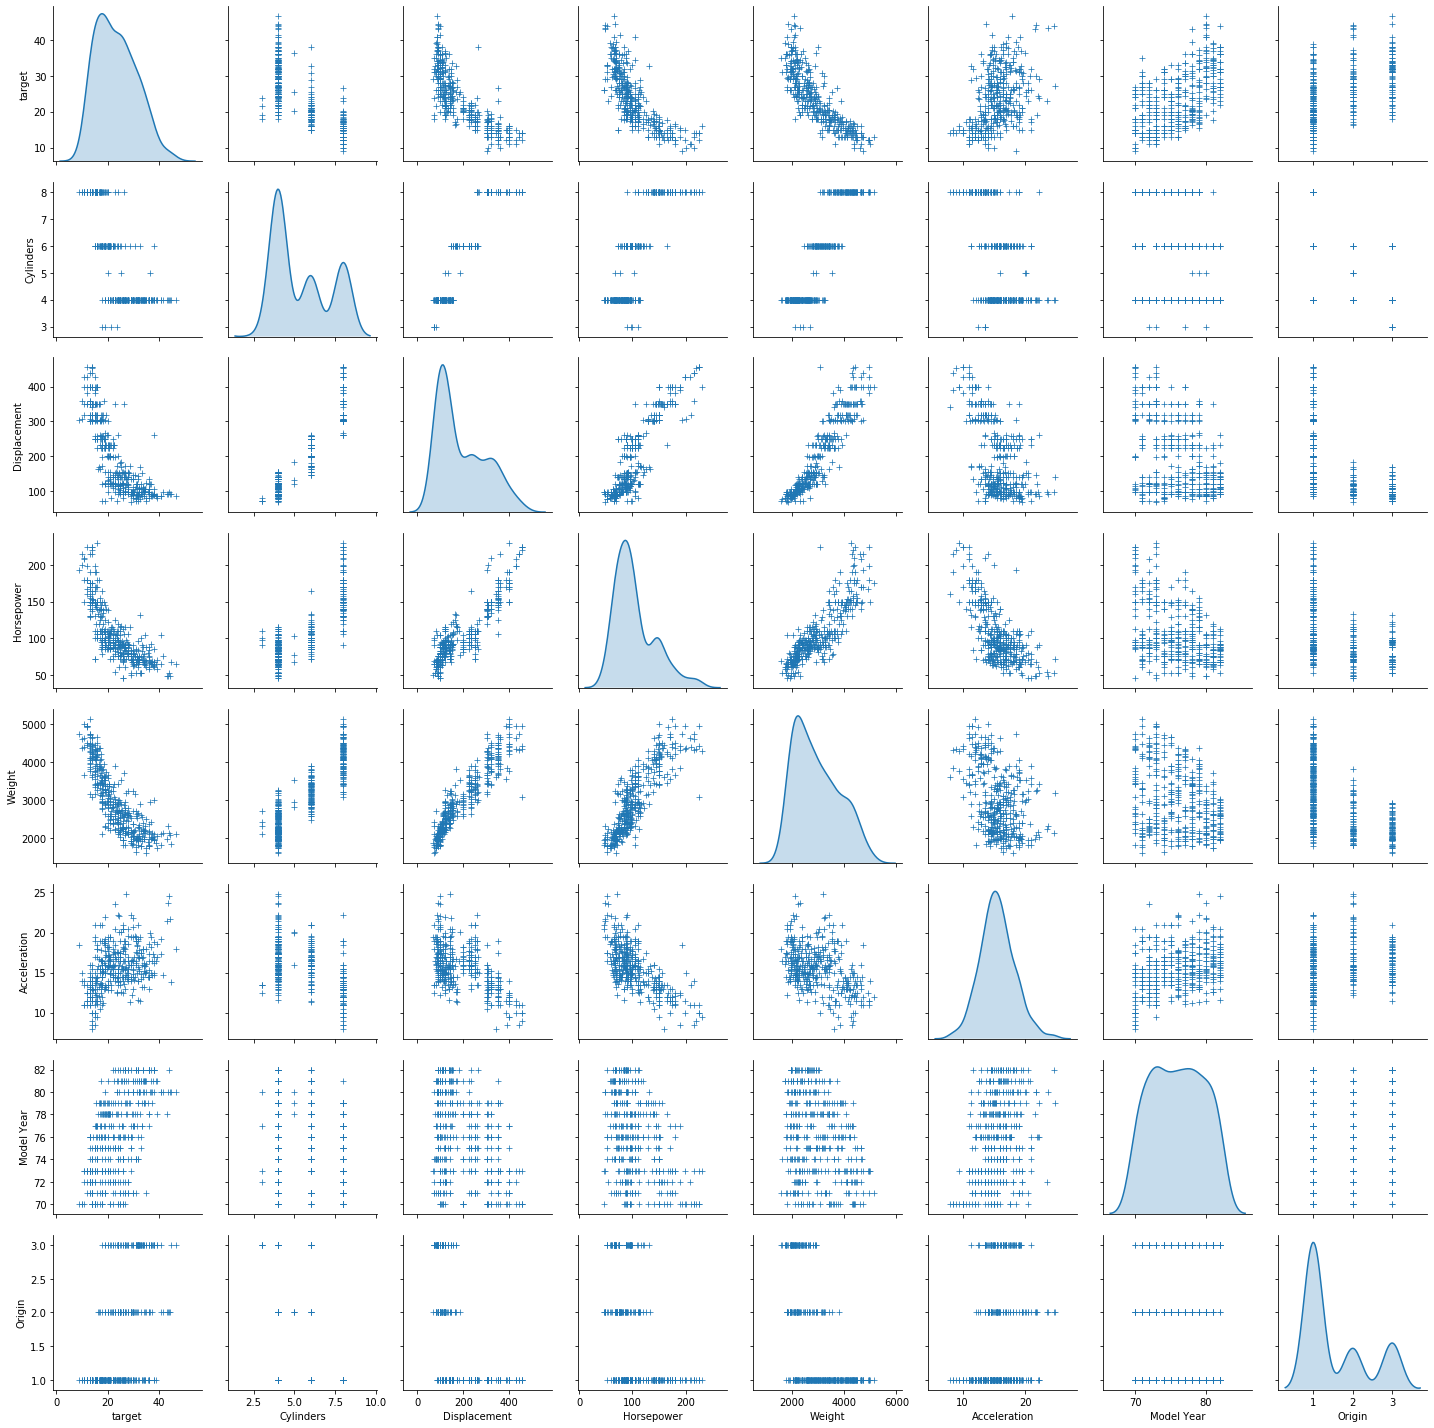

In [24]:
sns.pairplot(data, diag_kind = "kde", markers = "+")

In [25]:
# Cylinders and Origin can be categorical 

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

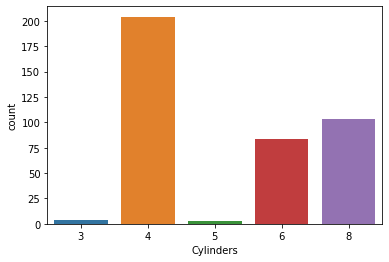

In [26]:
plt.figure()
sns.countplot(data["Cylinders"])
data["Cylinders"].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

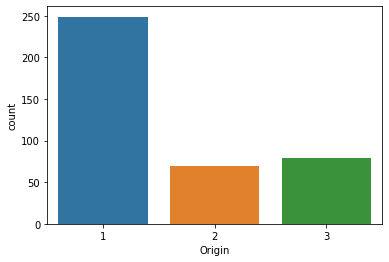

In [27]:
plt.figure()
sns.countplot(data["Origin"])
data["Origin"].value_counts()

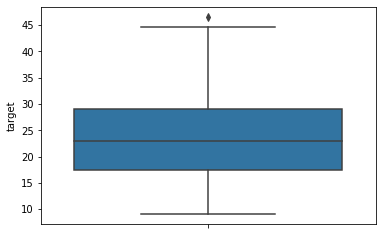

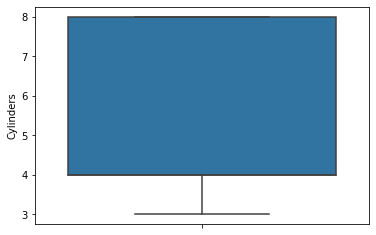

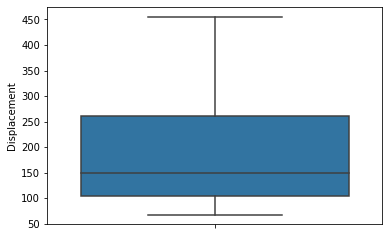

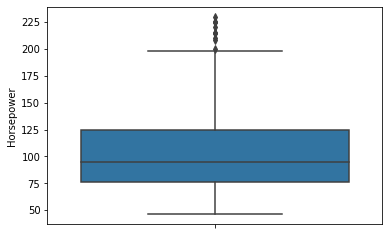

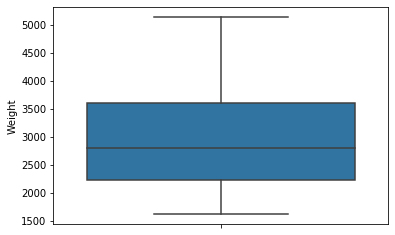

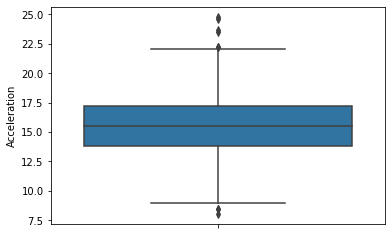

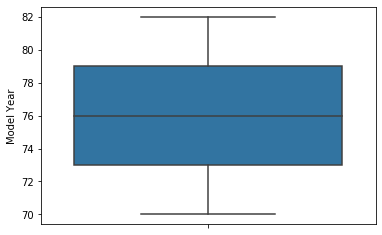

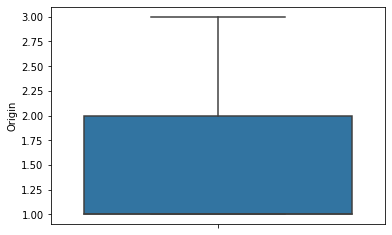

In [28]:
for c in data.columns:
    plt.figure()
    sns.boxplot(x=c,data=data,orient="v")

In [29]:
# Horsepower and Accelaration columns have outliers

## Outlier Handling

In [30]:
thr=1.5

In [31]:
horsepower_desc=data["Horsepower"].describe()
horsepower_desc

count    398.000000
mean     104.469388
std       38.199187
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: Horsepower, dtype: float64

In [32]:
Q3_HP = horsepower_desc[6]
Q1_HP= horsepower_desc[4]
IQR_HP = Q3_HP-Q1_HP
IQR_HP

49.0

In [33]:
top_limit_hp = thr*IQR_HP + Q3_HP
top_limit_hp

198.5

In [34]:
bottom_limit_hp = Q1_HP - thr*IQR_HP 
bottom_limit_hp

2.5

In [35]:
filter_top_hp = data["Horsepower"] < top_limit_hp

In [36]:
filter_bottom_hp = data["Horsepower"] > bottom_limit_hp

In [37]:
filter_hp = filter_top_hp & filter_bottom_hp

In [38]:
data=data[filter_hp]

In [39]:
acc_desc= data["Acceleration"].describe()

In [40]:
Q3_ACC = acc_desc[6]
Q1_ACC= acc_desc[4]
IQR = Q3_ACC - Q1_ACC

In [41]:
top_limit_acc = Q3_ACC + thr*IQR
bottom_limit_acc = Q1_ACC - thr*IQR

In [42]:
top_filter_acc = data["Acceleration"] < top_limit_acc
bottom_filter_acc = data["Acceleration"] > bottom_limit_acc
filter_acc = top_filter_acc & bottom_filter_acc

In [43]:
data= data[filter_acc]

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 397
Data columns (total 8 columns):
target          381 non-null float64
Cylinders       381 non-null int64
Displacement    381 non-null float64
Horsepower      381 non-null float64
Weight          381 non-null float64
Acceleration    381 non-null float64
Model Year      381 non-null int64
Origin          381 non-null int64
dtypes: float64(5), int64(3)
memory usage: 26.8 KB


## Feature Engineering(Skewness)

### Dependent Variable(Target)

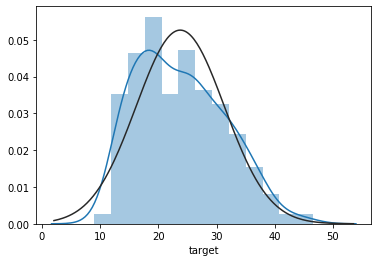

In [45]:
sns.distplot(data.target,fit=norm)

In [46]:
(mu, sigma) = norm.fit(data["target"])
(mu,sigma)

(23.76167979002625, 7.58107889968785)

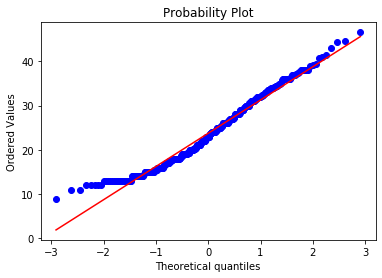

In [47]:
plt.figure()
stats.probplot(data["target"],plot=plt)
plt.show()

In [48]:
data["target"] = np.log1p(data["target"])

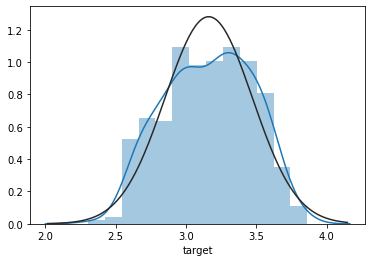

In [49]:
plt.figure()
sns.distplot(data.target,fit=norm)

In [50]:
(mu, sigma) = norm.fit(data["target"])
(mu,sigma)

(3.161688999706393, 0.31140968687258697)

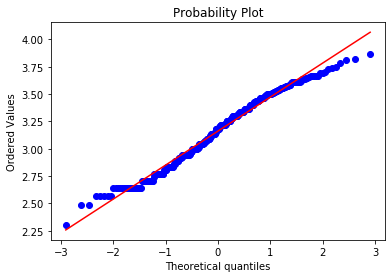

In [51]:
plt.figure()
stats.probplot(data["target"],plot=plt)
plt.show()

### Independent Variable


In [52]:
skewed_features = data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [53]:
skewness = pd.DataFrame(skewed_features,columns=["skewed"])
skewness

,skewed
Origin,0.882740
Horsepower,0.855351
Displacement,0.702323
Cylinders,0.598230
Weight,0.566934
Acceleration,0.256853
Model Year,-0.010564
target,-0.113193


## One Hot Encoding

In [54]:
data["Cylinders"] = data["Cylinders"].astype(str) 
data["Origin"] = data["Origin"].astype(str) 

In [55]:
data = pd.get_dummies(data)
data

,target,Displacement,Horsepower,Weight,Acceleration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,2.944439,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,2.772589,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,2.944439,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,2.833213,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,2.890372,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.332205,151.0,90.0,2950.0,17.3,82,0,1,0,0,0,1,0,0
393,3.332205,140.0,86.0,2790.0,15.6,82,0,1,0,0,0,1,0,0
395,3.496508,135.0,84.0,2295.0,11.6,82,0,1,0,0,0,1,0,0
396,3.367296,120.0,79.0,2625.0,18.6,82,0,1,0,0,0,1,0,0


## Train/Test Splitting and Standartization

In [56]:
x = data.drop(["target"],axis=1)
y= data["target"]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.9,random_state=42)

In [57]:
scaler=StandardScaler()

In [58]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Linear Regression

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred = lr.predict(X_test)
mse= mean_squared_error(y_test,y_pred)
mse

0.019726114267156213

## Ridge Regression

In [62]:
ridge = Ridge(random_state=42,max_iter=10000)

In [63]:
alphas = np.logspace(-4,-0.5,30)

In [64]:
tuned_parameters = [{'alpha':alphas}]

In [65]:
clf = GridSearchCV(ridge,tuned_parameters,cv=10,scoring = "neg_mean_squared_error", refit = True)
clf.fit(X_train,y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

In [66]:
clf.best_estimator_.coef_

array([-0.01352078, -0.16673583,  0.01063326, -0.04935468,  0.11179752,
        0.        ,  0.03752242,  0.        , -0.04011354, -0.0039318 ,
       -0.01362703, -0.00629499,  0.0225981 ])

In [67]:
ridge = clf.best_estimator_
print("Ridge Best Estimator: ", ridge)

Ridge Best Estimator:  Ridge(alpha=0.31622776601683794, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=False, random_state=42, solver='auto',
      tol=0.001)


In [68]:
y_pred= clf.predict(X_test)

In [69]:
mse = mean_squared_error(y_test, y_pred)
print("Ridge MSE: ",mse)

Ridge MSE:  0.01836806251851841


Text(0.5, 1.0, 'Ridge')

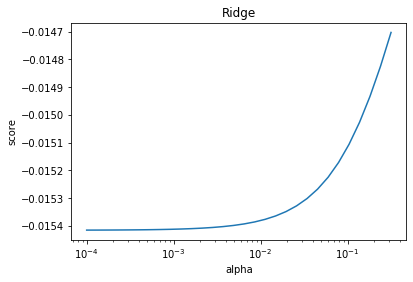

In [70]:
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")

## Lasso Regression

In [71]:
lasso = Lasso(random_state=42, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]

In [73]:
clf = GridSearchCV(lasso, tuned_parameters, cv=10, scoring='neg_mean_squared_error',refit=True)
clf.fit(X_train,y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

In [75]:
print("Lasso Coef: ",clf.best_estimator_.coef_)
lasso = clf.best_estimator_
print("Lasso Best Estimator: ",lasso)

Lasso Coef:  [-0.         -0.15416551 -0.00506953 -0.039078    0.10698488  0.
  0.04914928  0.         -0.02791716 -0.         -0.00636711  0.
  0.02485231]
Lasso Best Estimator:  Lasso(alpha=0.006461670787466976, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False)


In [76]:
y_pred= lasso.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Lasso MSE: ",mse)

Lasso MSE:  0.017727501515355782


Text(0.5, 1.0, 'Lasso')

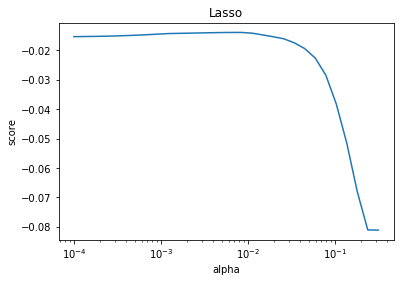

In [77]:
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")


## ElasticNet

In [78]:
eNet = ElasticNet(random_state=42, max_iter=10000)

In [79]:
parametersGrid = {"alpha": alphas,
                  "l1_ratio": np.arange(0.0, 1.0, 0.05)}

In [80]:
clf = GridSearchCV(eNet, parametersGrid, cv=10, scoring='neg_mean_squared_error', refit=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=10000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=42, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2....
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01]),
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [81]:
print("ElasticNet Coef: ",clf.best_estimator_.coef_)
print("ElasticNet Best Estimator: ",clf.best_estimator_)

ElasticNet Coef:  [-0.02279258 -0.10132468 -0.04458877 -0.02548297  0.10986926  0.
  0.02894143  0.         -0.0258312  -0.         -0.00998543  0.
  0.02325318]
ElasticNet Best Estimator:  ElasticNet(alpha=0.07880462815669913, copy_X=True, fit_intercept=True,
           l1_ratio=0.05, max_iter=10000, normalize=False, positive=False,
           precompute=False, random_state=42, selection='cyclic', tol=0.0001,
           warm_start=False)


In [83]:
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("ElasticNet MSE: ",mse)

ElasticNet MSE:  0.016276906095088008


## XGBoost

In [84]:
model_xgb = xgb.XGBRegressor()

In [86]:
parametersGrid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}

In [88]:
clf = GridSearchCV(model_xgb, parametersGrid, cv = 10, scoring='neg_mean_squared_error', refit=True, n_jobs = -1, verbose=True)
clf.fit(X_train, y_train)
model_xgb = clf.best_estimator_


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   29.4s finished


[19:23:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:23:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [89]:
y_pred=model_xgb.predict(X_test)

In [91]:
mse = mean_squared_error(y_test,y_pred)
print("XGBRegressor MSE: ",mse)

XGBRegressor MSE:  0.015625404331166347


In [97]:
class AveragingModels():
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)  


averaged_models = AveragingModels(models = (model_xgb, lasso))
averaged_models.fit(X_train, y_train)

y_pred= averaged_models.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Averaged Models MSE: ",mse)

[19:25:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:25:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Averaged Models MSE:  0.015204872416571206
